# Pima Indians Diabetes

## 1. Định nghĩa vấn đề.

### 1.1 Mô tả.
 Bộ dữ liệu này có nguồn gốc từ Viện Quốc gia về Bệnh Tiểu đường, Tiêu hóa và Thận. Mục tiêu của bộ dữ liệu là dự đoán chẩn đoán xem một bệnh nhân có mắc tiểu đường hay không, dựa trên một số chỉ số chẩn đoán được đưa vào trong bộ dữ liệu.Một số ràng buộc đã được đặt ra khi lựa chọn các trường hợp này từ một cơ sở dữ liệu lớn hơn.Cụ thể, tất cả bệnh nhân trong bộ dữ liệu này đều là nữ, từ 21 tuổi trở lên, và thuộc người da đỏ Pima.

### 1.2 Thuộc tính.
+ Number of times pregnant: Số lần mang thai.
+ Plasma glucose concentration a 2 hours in an oral glucose tolerance test: Nồng độ glucose trong huyết tương sau 2 giờ trong xét nghiệm dung nạp glucose đường uống.
+ Diastolic blood pressure (mm Hg): Huyết áp tâm trương.
+ Triceps skin fold thickness (mm): Độ dày nếp gấp da ở cơ tam đầu.
+ 2-Hour serum insulin (mu U/ml): Lượng insulin trong huyết thanh sau 2 giờ.
+ Body mass index (weight in kg/(height in m)^2): Chỉ số khối cơ thể.
+ Diabetes pedigree function: Hàm phả hệ tiểu đường (thể hiện khả năng di truyền mắc tiểu đường).
+ Age (years): Tuổi
+ Class variable (0 or 1): Biến phân loại (0 = không mắc tiểu đường, 1 = mắc tiểu đường).

## 2. Chuẩn bị vấn đề.

### 2.1 Khai báo thư viện.

In [59]:
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Nạp dữ liệu

In [60]:
columns_name = ['Pregancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
data = pd.read_csv('../../../dataset/pima-indians-diabetes.csv', names = columns_name)

## 3. Phân tích dữ liệu.

### 3.1 Thống kê mô tả.

#### (1) Hiển thị một số thông tin về dữ liệu.
+ Số dòng, số cột của dữ liệu.
+ Kiểu dữ liệu của từng cột.
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu.
+ Thông tin chung về dữ liệu.

In [61]:
print(f'+ Shape: {data.shape}')
print(f'+ Data Types: \n{data.dtypes}')
print(f'+ Contents: ')
display.display(data.head(5))
display.display(data.tail(5))
data.info()

+ Shape: (768, 9)
+ Data Types: 
Pregancies                    int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object
+ Contents: 


,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregancies                768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 8 tính chất để phân lớp:
    + Number of times pregnant (đơn vị: số lần)
    + Plasma glucose concentration a 2 hours in an oral glucose tolerance test (đơn vị: mm Hg)
    + Diastolic blood pressure (đơn vị: mm Hg)
    + Triceps skin fold thickness (đơn vị: mm)
    + 2-Hour serum insulin (đơn vị: mu U/ml)
    + Body mass index (đơn vị: weight in kg/(height in m)^2)
    + Diabetes pedigree function.
    + Age (đơn vị: năm)
    + Class variable (0 hoặc 1)
+ Tổng số dòng dữ liệu là 768 dòng
+ Dữ liệu để phân lớp ở cột class

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [62]:
has_null = data.isnull().sum().any()
has_nan = data.isna().sum().any()
n_duplicated = data.duplicated().sum()
print('Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị NULL: {has_null}')
if has_null:
    display.display(data[data.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(data[data.isna().any(axis = 1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    display.display(data[data.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị NULL: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét:**
+ Dữ liệu không có giá trị rỗng (NaN, Null).
+ Dữ liệu không có giá trị trùng

#### (3) Các tính chất thống kê trên dữ liệu số.
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [63]:
description = data.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**
+ Các dữ liệu đều đầy đủ và không bị thiếu.
+ Ở thuộc tính 2-Hour serum insulin, có thể có outlier vì giá trị max cao bất thường so với giá trị 75%.

#### (4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [64]:
data["Class"].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

**Nhận xét**
+ Dữ liệu phân loại 1 người có bị bệnh tiểu đường hay không.
+ Tổng số mẫu 768:
    + 65% không mắc bệnh.
    + 35% mắc bệnh.
+  Dữ liệu mất cân bằng, class 0 đang nhiều hơn class 1 gấp đôi.

#### (5) Mối tương quan giữa các tính chất

In [65]:
correlations = data.corr(method = "pearson")
display.display(correlations)

,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét:**
+ Các tính chất có độ tương đồng không quá cao, nằm ở mức trung bình.
+ Cặp tính chất có mức tương đồng cao là: (Age, Number of times pregnant).

### 3.2 Hiển thị dữ liệu.

#### (1) Hiển thị dữ liệu trên từng tính chất đơn (Univariate Plots).

**Box and whisker plots**

<Axes: >

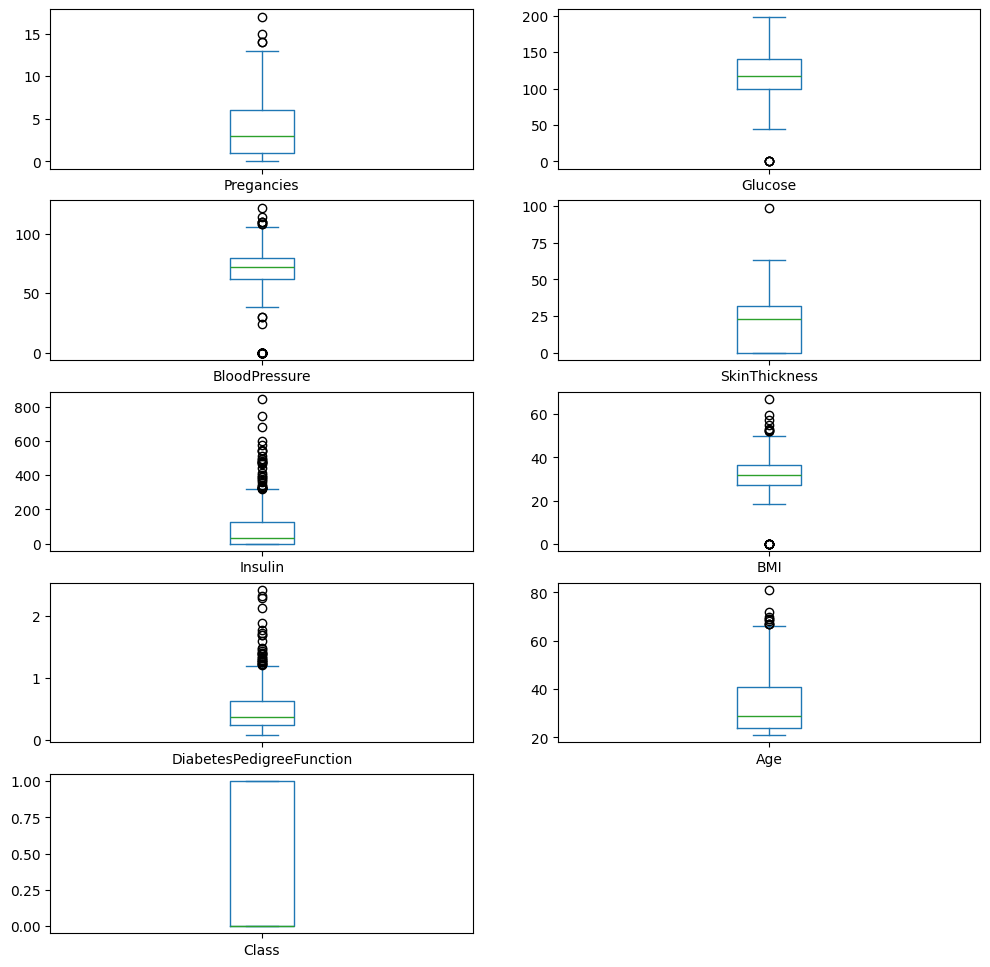

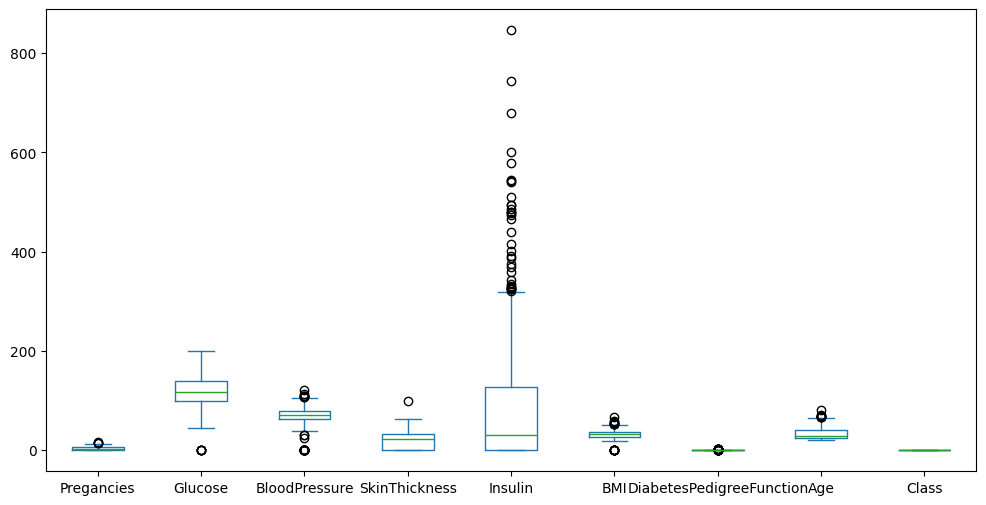

In [66]:
data.plot(kind = "box", subplots = True, layout = (5, 2), sharex = False, sharey = False, figsize = (12, 12))
data.plot(kind = "box", figsize = (12, 6))

**Nhận xét:**
+ Tất cả các thuộc tính điều có ngoại lệ.
+ Thuộc tính Pregancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age lệch.
+ Thuộc tính Glucose, BMI và BloodPressure phân bố khá cân bằng.
+ Dữ liệu ở thuộc tính Insulin phân bố rộng và có nhiều ngoại lệ.

**Biểu đồ histogram**

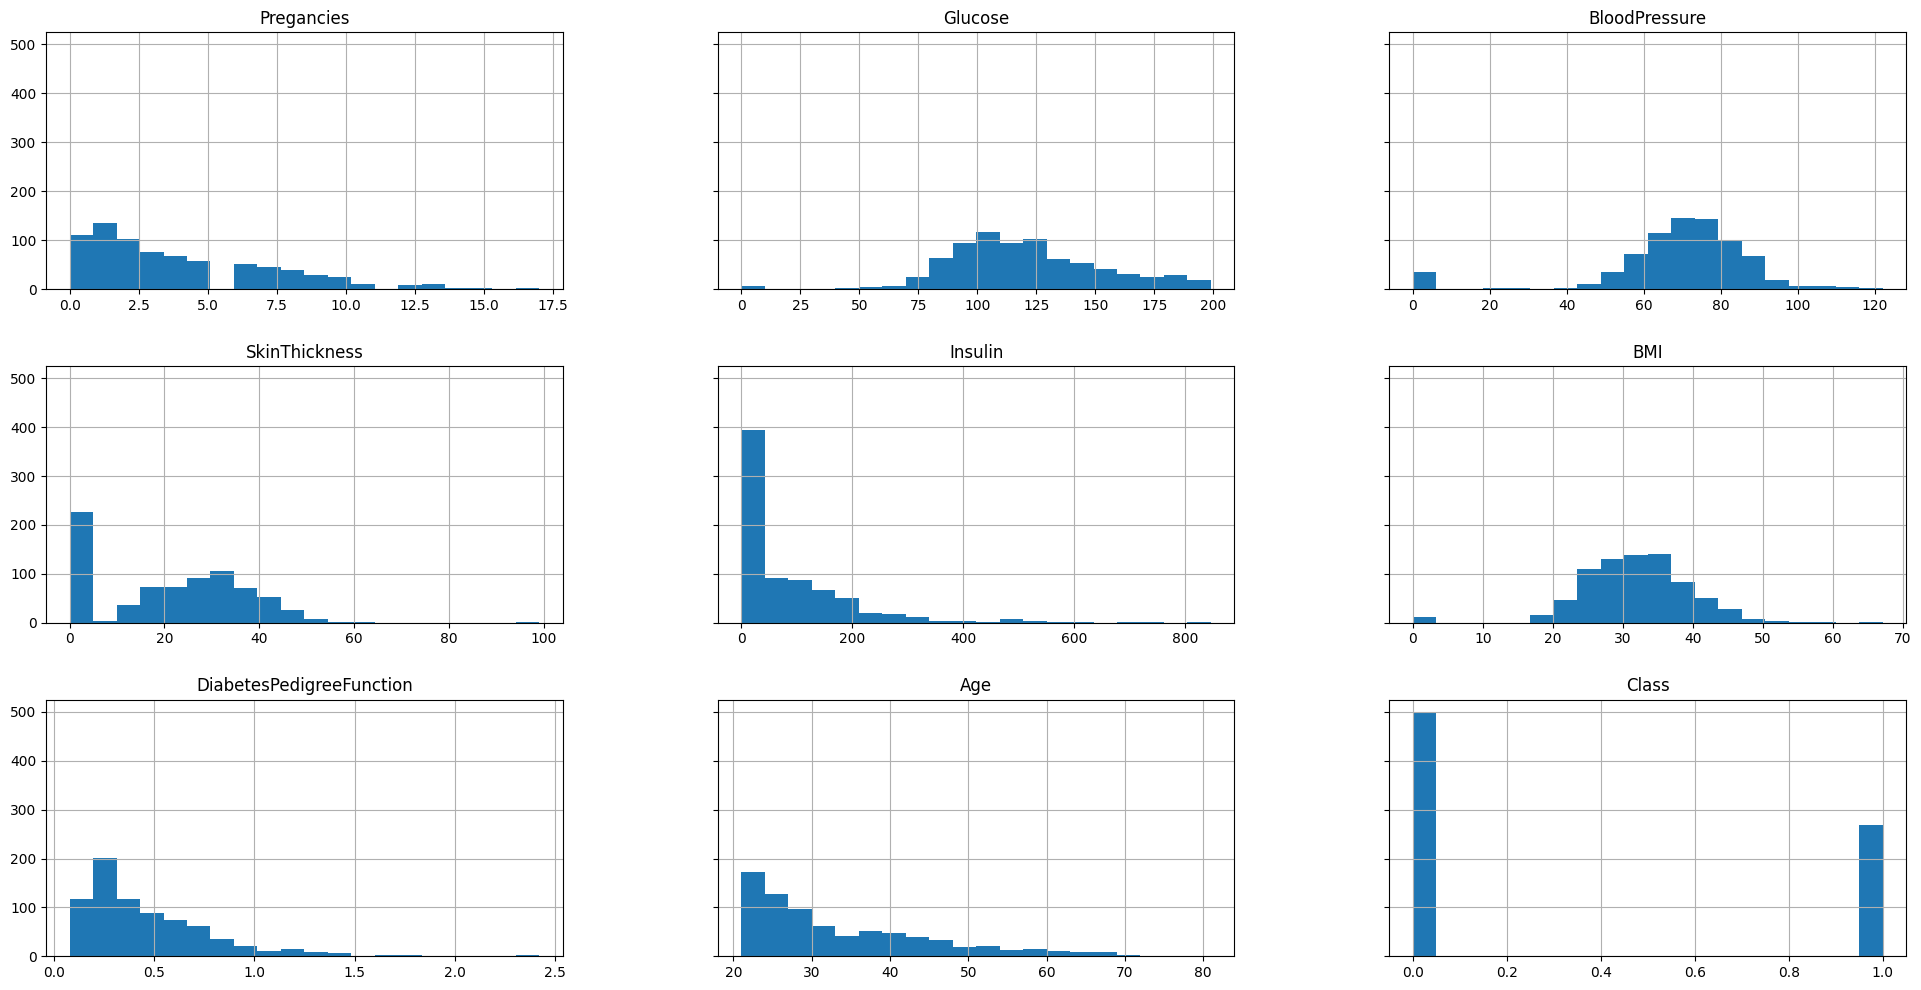

In [67]:
data.hist(figsize=(24, 12), bins = 20, sharex = False, sharey = True);

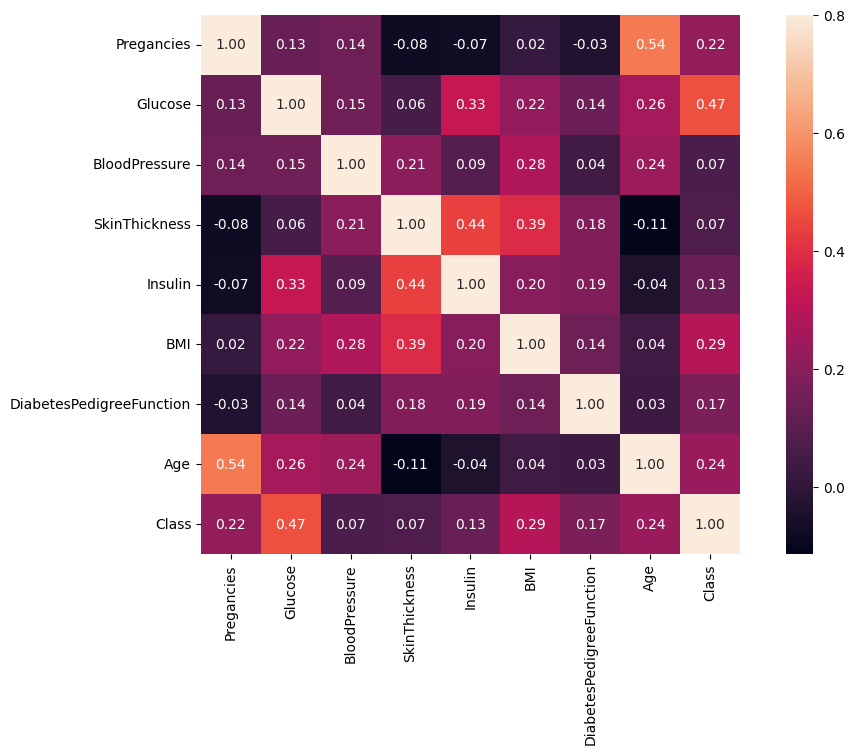

In [68]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

+ Glucose và Class có độ tương đồng tương đối cao. Điều này có nghĩa là việc chuẩn đoán 1 người mắc bệnh tiểu đường hay không